https://medium.com/@bravinwasike18/building-a-deep-learning-model-with-keras-and-resnet-50-9dd6f4eb3351

import tensorflow as tf
from tensorflow import keras

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow. keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras import layers

In [3]:
flowers_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [4]:
import pathlib
flowers_data = tf.keras.utils.get_file('flower_photos', origin=flowers_url, untar=True)
flowers_data = pathlib.Path(flowers_data)

228813984/228813984 [==============================] - 1s 0us/step


In [5]:
print(flowers_data)

/root/.keras/datasets/flower_photos


In [6]:
all_sunflowers = list(flowers_data.glob('sunflowers/*'))

/root/.keras/datasets/flower_photos/sunflowers/20704967595_a9c9b8d431.jpg


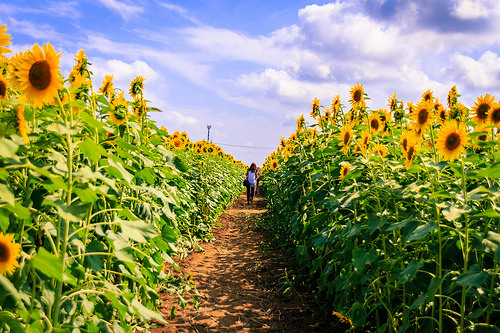

In [7]:
import PIL
print(all_sunflowers[1])
PIL.Image.open(str(all_sunflowers[1]))

In [8]:
all_roses = list(flowers_data.glob('roses/*'))

/root/.keras/datasets/flower_photos/roses/21347496068_f4d3339607.jpg


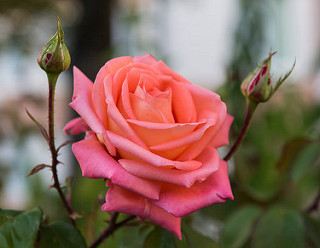

In [9]:
import PIL
print(all_roses[1])
PIL.Image.open(str(all_roses[8]))

In [10]:
height,width=180,180

In [11]:
training_batch_size=32

In [12]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
flowers_data,
validation_split=0.2,
subset="training",
seed=123,
image_size=(height,width),
batch_size=training_batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [13]:
image_cat = train_set.class_names
print(image_cat)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [14]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
flowers_data,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(height, width),
batch_size=training_batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [15]:
dnn_model = Sequential()

In [16]:
imported_model= tf.keras.applications.ResNet50(include_top=False,
  input_shape=(180,180,3),
  pooling='avg',classes=5,
  weights='imagenet')


for layer in imported_model.layers:
  layer.trainable=False

94765736/94765736 [==============================] - 1s 0us/step


In [17]:
dnn_model.add(imported_model)
dnn_model.add(Flatten())
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(5, activation='softmax'))

In [18]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 5)                 2565      
 apper)                                                          
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

In [19]:
from tensorflow.keras.optimizers import Adam
dnn_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
history = dnn_model.fit(
train_set,
validation_data=validation_set,
epochs=10
)

Epoch 1/10
92/92 [==============================] - 23s 118ms/step - loss: 0.7278 - accuracy: 0.7779 - val_loss: 0.4251 - val_accuracy: 0.8433
Epoch 2/10
92/92 [==============================] - 9s 95ms/step - loss: 0.2806 - accuracy: 0.8961 - val_loss: 0.4397 - val_accuracy: 0.8324
Epoch 3/10
92/92 [==============================] - 8s 88ms/step - loss: 0.1770 - accuracy: 0.9366 - val_loss: 0.4177 - val_accuracy: 0.8542
Epoch 4/10
92/92 [==============================] - 9s 89ms/step - loss: 0.0941 - accuracy: 0.9721 - val_loss: 0.4409 - val_accuracy: 0.8556
Epoch 5/10
92/92 [==============================] - 9s 95ms/step - loss: 0.0534 - accuracy: 0.9874 - val_loss: 0.3798 - val_accuracy: 0.8733
Epoch 6/10
92/92 [==============================] - 9s 94ms/step - loss: 0.0272 - accuracy: 0.9966 - val_loss: 0.4022 - val_accuracy: 0.8719
Epoch 7/10
92/92 [==============================] - 10s 109ms/step - loss: 0.0141 - accuracy: 0.9986 - val_loss: 0.4345 - val_accuracy: 0.8801
Epoch 8/1

https://www.tutorialspoint.com/keras/keras_real_time_prediction_using_resnet_model.htm